In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use = 'fivethirtyeight'


## DRILL - Descriptive Statistics and Normality

*To complete the following drills, you'll need to use your Python skills to create some datasets, then use your new statistical knowledge to summarize them. **Choose 6 distributions** from the list of random distributions available in NumPy, called “Distributions”*

1. *Generate a random variable with **100 datapoints** using the code distributionvar = np.random.distributionname([arguments], 100), replacing distributionvar with an appropriate variable name and distributionname with the name of the distribution you’ve chosen, and filling in the empty space in the parentheses with your chosen values for the appropriate parameters. If you feel uncertain about how to do this, go back to the “Other Distributions” assignment for examples of code to use as a starting point.*

In [2]:
# this is the 'given' per the task above
#     format is    {'method'     : {ID : {kwargs                             }},      } 
my_distributions = {'binomial'   : {1  : {'n':3,      'p':0.75,    'size':100}},
                     'chisquare' : {1  : {'df':4,                  'size':100}},
                     'gamma'     : {1  : {'shape':5,  'scale':1.0, 'size':100}},
                     'laplace'   : {1  : {'loc':0.0,  'scale':1.0, 'size':100}},
                     'lognormal' : {1  : {'mean':0.0, 'sigma':1.0, 'size':100}},
                     'weibull'   : {1  : {'a':5,                   'size':100}}           
                    }

In [3]:
print(my_distributions.keys())

dict_keys(['binomial', 'chisquare', 'gamma', 'laplace', 'lognormal', 'weibull'])


In [4]:
# create df from numpy pdf's from dict {'distribution' : {kwargs}

def var_pdfs(dict):
    df = pd.DataFrame()
    for key in dict.keys():
        for ky in dict[key].keys():
            col = key + '_' + str(ky).rjust(3,'0')             # for multiple pdf's of same type
            df[col] = getattr(np.random, key)(**dict[key][ky])    
    return df

In [5]:
my_distr_df = var_pdfs(my_distributions)
my_distr_df.describe()

,binomial_001,chisquare_001,gamma_001,laplace_001,lognormal_001,weibull_001
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.210000,4.014107,5.105267,-0.086880,1.885900,0.860129
std,0.820138,2.935703,2.276742,1.307540,2.477164,0.225461
min,0.000000,0.033619,1.232618,-4.136479,0.062086,0.189203
25%,2.000000,1.853336,3.478354,-0.862807,0.443022,0.683190
50%,2.000000,3.464664,4.894759,0.049610,1.152658,0.865889
75%,3.000000,5.445710,6.302614,0.850919,2.210771,1.059179
max,3.000000,15.744100,11.688571,2.822624,17.292500,1.257761


In [6]:
print(my_distr_df.columns)

Index(['binomial_001', 'chisquare_001', 'gamma_001', 'laplace_001',
       'lognormal_001', 'weibull_001'],
      dtype='object')


In [7]:
# this function plots a histogram per questions 2. and 3. above
# returns figure() of histograms in two column format from each DataFrame column

def hists_from_df(df):
    col_wdth = 9; row_hght = 6; ncols = 2   # given
    nrows = len(df.columns)
    nbins = 25
    xmin = 3; ymin = 0; xmax = 18; ymax = 25
    
    fig = plt.figure(1, (col_wdth * ncols, row_hght * nrows))
                     
    index = 0
    for col in df.columns:
        index += 1
        plt.subplot(nrows, ncols, index)
        plt.hist(getattr(df, col), bins=nbins, color='c')       
        plt.axvline(df[col].mean(), color='b', linestyle='solid', linewidth=2)                   # vertical line at the mean.    
        plt.axvline(df[col].mean() + df[col].std(), color='b', linestyle='dashed', linewidth=2)  # dashed line at +1 std dev
        plt.axvline(df[col].mean() - df[col].std(), color='b', linestyle='dashed', linewidth=2)  # dashed line at -1 std dev
        plt.title(col + ' distribution')
        
    return fig


2. *Graph the variable using a histogram.*
3. *Compute the mean and standard deviation and plot them as vertical lines on the histogram. (Hint: the “When Does It Break?” assignment you just completed can help you here.)*

**Shown Below**

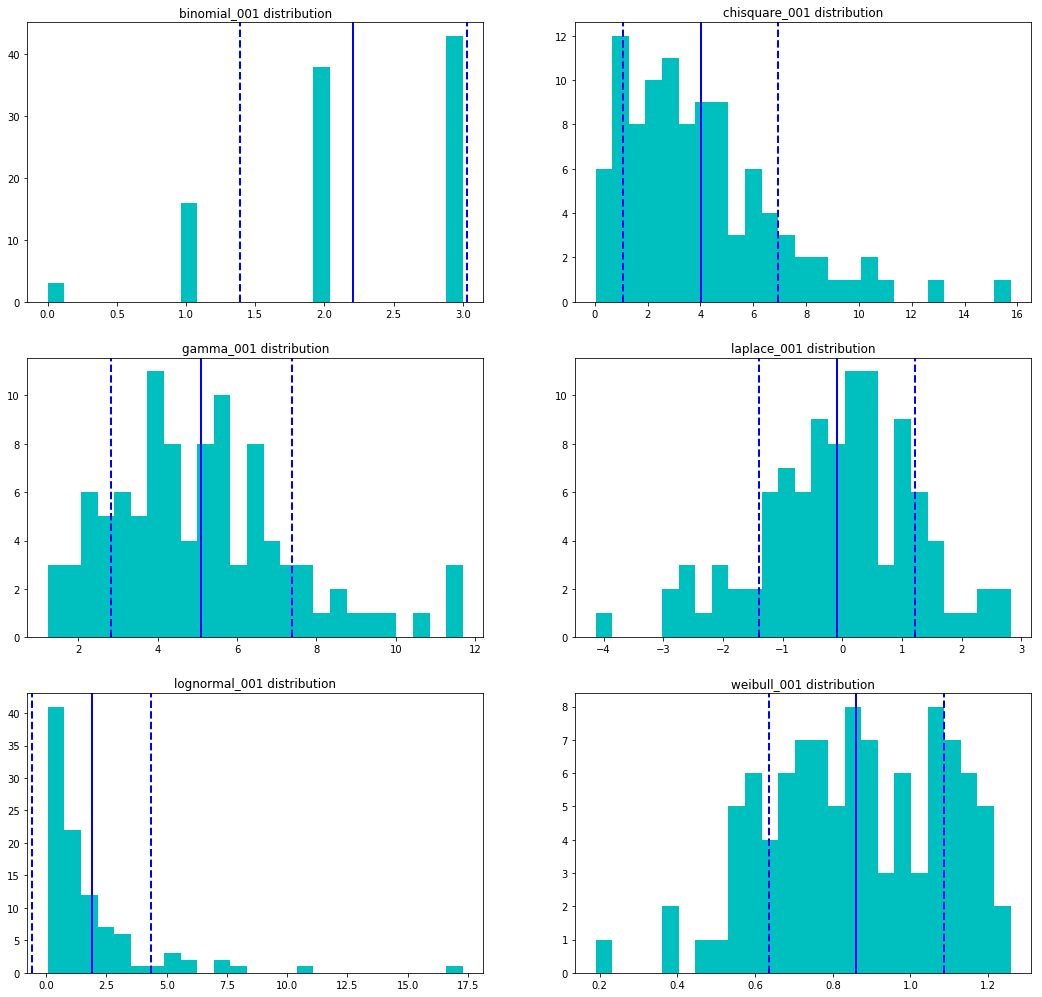

In [8]:
my_plot = hists_from_df(my_distr_df)

4. *Evaluate whether the descriptive statistics provided useful information about the variable. Can you identify any common characteristics of the distributions that could be usefully described using the mean and/or standard deviation, versus the ones that could not?*

Whether the mean and standard deviation are useful statistics depends on the distribution shape or how it relates to a Normal distribution. With respect to my six distributions, for the Binomial distribution both mean and standard deviation are not useful. Both statistics will describe the Laplace distribution. For the Log-normal distribution, the mean is useful while the standard deviation is not due to the skewed shape. For the Gamma, Weibull and Chi-square distribution it will depend on the shape parameters with the mean typically being relavent while the standard deviation is not. 
 


*Additionally:*

1. *Generate two normally-distributed variables, one with a mean of 5 and standard deviation of 0.5, and the other with a mean of 10 and standard deviation of 1.0*
2. *Add them together to create a third variable.*

In [9]:
# this is the 'given' per the task above
#       format is    {'method' : {ID : {kwargs                             }},     } 
more_distributions = {'normal' : {1  : {'loc':5.0,  'scale':0.5, 'size':1000},
                                  2  : {'loc':10.0, 'scale':1.0, 'size':1000}}
                     }

In [10]:
more_distr_df = var_pdfs(more_distributions)
more_distr_df['add_1_2'] = more_distr_df[more_distr_df.columns[0]] + more_distr_df[more_distr_df.columns[1]]

3. *Graph the third variable using a histogram.*
4. *Compute the mean and standard deviation and plot them as vertical lines on the histogram.* 

**See below**

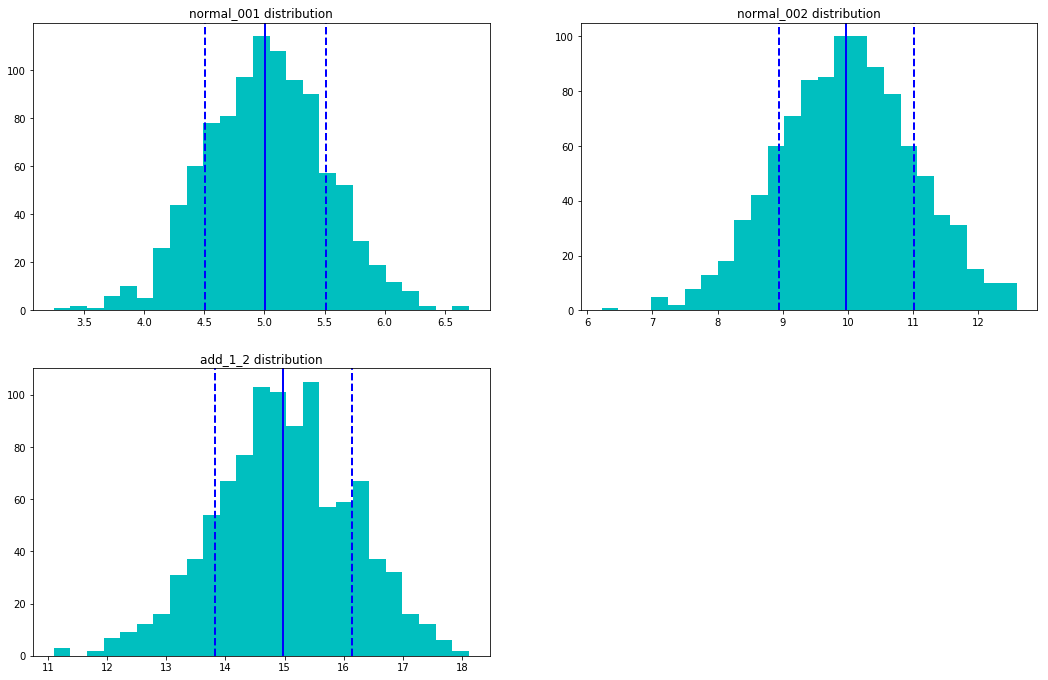

In [11]:
more_plot = hists_from_df(more_distr_df)

5. *Evaluate the descriptive statistics against the data.*

The sum of two normal distribution is also normal and the mean will be the sum of the means of the two normal distributions. This is shown below.  I thought the variance of the sum of two normal distributions is likwise the sum of the two variances.  Calculated from the probability density functions directly that would be 1^2 + 0.5^2 = 1.2500.  Using the three samples I get 1.2527 and 1.877.  

In [12]:
more_distr_df.describe()

,normal_001,normal_002,add_1_2
count,1000.000000,1000.000000,1000.000000
mean,5.007970,9.972212,14.980182
std,0.503996,1.036143,1.151928
min,3.250814,6.220734,11.098679
25%,4.661563,9.269388,14.226669
50%,5.015733,9.983167,14.967880
75%,5.353863,10.674014,15.779313
max,6.699549,12.587433,18.115805


In [13]:
print(more_distr_df['normal_001'].mean() + more_distr_df['normal_002'].mean()) 
print(more_distr_df['add_1_2'].mean())

14.980181632610954
14.980181632610925


In [14]:
print(more_distr_df['normal_001'].var() + more_distr_df['normal_002'].var()) 
print(more_distr_df['add_1_2'].var())

1.3276041015423898
1.3269388688098698


In [15]:
print(more_distr_df['normal_001'].std() + more_distr_df['normal_002'].std()) 
print(more_distr_df['add_1_2'].std())

1.5401390119356289
1.1519283262468503
